In [11]:
# Import libraries
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
# set inline plots size
plt.rcParams["figure.figsize"] = (12, 7) # (w, h)
import numpy as np
import cv2 as cv

In [24]:
!wget https://www.dropbox.com/s/gi5ph9oieeklaxp/person.png?dl=0 -O person.jpg

--2022-08-30 12:38:20--  https://www.dropbox.com/s/gi5ph9oieeklaxp/person.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/gi5ph9oieeklaxp/person.png [following]
--2022-08-30 12:38:21--  https://www.dropbox.com/s/raw/gi5ph9oieeklaxp/person.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2b89f7ba28c7e73882d6bd4dce.dl.dropboxusercontent.com/cd/0/inline/Br_fPoT1T49vjYckp5_rIS2IcmgJ-MqakqcMdnuVzxmhK8FTg2rH40qp6QPOUcMpa67n24ZluNX4IejMH4uAgsnfFF0rbwsH4Fa_a-s2-SpZCdr1tATBBm4m9Utix1nrftLWiLq0AkKASv15zI3ta65UpHvRZQScAviUbo4RYwtmrg/file# [following]
--2022-08-30 12:38:22--  https://uc2b89f7ba28c7e73882d6bd4dce.dl.dropboxusercontent.com/cd/0/inline/Br_fPoT1T49vjYckp5_rIS2IcmgJ-MqakqcMdnuVzxmhK8FTg2rH40qp6QPOUcMpa67n24ZluNX4Iej

### Skin detection

**Skin detection is done as follows:**

$(Saturation >= 0.2) AND (0.5<Luminance/Saturation<0.3)AND (Hue<=28$ $OR$ $  Hue>=330)$

However since in OpenCV the saturation and luminance range from 0 to 255 and hue ranges from 0 to 179, **skin detection in OpenCV is done as follows:**

$(Saturation >= 50) AND (0.5<Luminance/Saturation<3)AND (Hue<=14$ $OR$ $  Hue>=165)$

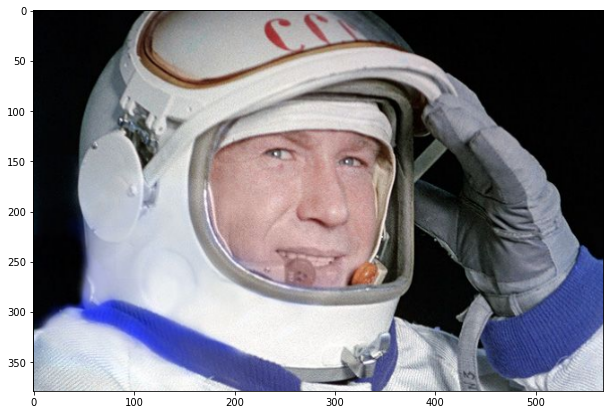

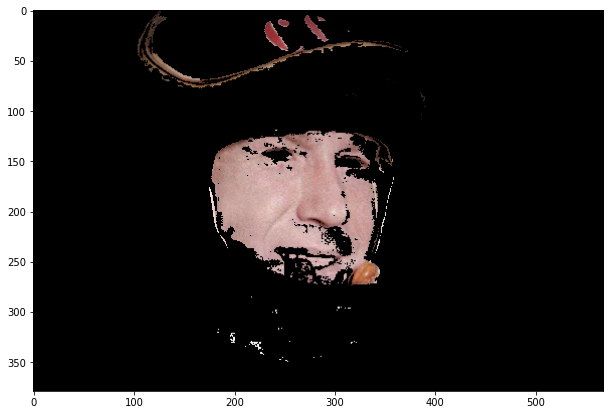

In [25]:
# load an image
img_person = cv.imread('person.jpg', cv.IMREAD_COLOR)
img_person = cv.cvtColor(img_person, cv.COLOR_BGR2RGB)
# show an image
plt.imshow(img_person)
plt.show()
# conver to HSV (hue, saturation, value)
img_person_hls = cv.cvtColor(img_person, cv2.COLOR_RGB2HLS)
# split to three channels
img_h, img_l, img_s = cv.split(img_person_hls)

# detecting the skin
for i in range (img_person.shape[0]):
  for j in range  (img_person.shape[1]):
    if (img_s[i,j]>=50) and img_l[i,j]/img_s[i,j]>0.5 and  img_l[i,j]/img_s[i,j]<3 and (img_h[i,j]<=14 or img_h[i,j]>=165):
      pass
    else: 
      img_person[i,j] = 0

# show detected skin
plt.imshow(img_person)
plt.show()